In [1]:
import pandas as p

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import seaborn as s 

In [4]:
import numpy as n 

In [5]:
import warnings 

In [6]:
warnings.filterwarnings("ignore")

In [7]:
data = p.read_csv('fake_job_postings.csv') 

In [8]:
df=data.dropna() 

In [9]:
X = df.drop(labels='fraudulent', axis=1) 

In [10]:
y = df.loc[:,'fraudulent']   

In [11]:
from sklearn.model_selection import train_test_split 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 

In [13]:
print("Number of training dataset: ", len(X_train))

Number of training dataset:  541


In [14]:
print("Number of test dataset: ", len(X_test)) 

Number of test dataset:  233


In [15]:
print("Total number of dataset: ", len(X_train)+len(X_test))

Total number of dataset:  774


In [16]:
df.groupby('fraudulent').describe()

job_id                                                           \
            count         mean          std   min     25%     50%      75%   
fraudulent                                                                   
0           702.0  8808.428775  5028.881929   7.0  4483.5  8768.0  13176.0   
1            72.0  7256.819444  4670.761142  99.0  4503.5  6549.0   9404.0   

                    telecommuting            ... has_company_logo       \
                max         count      mean  ...              75%  max   
fraudulent                                   ...                         
0           17866.0         702.0  0.085470  ...              1.0  1.0   
1           17814.0          72.0  0.180556  ...              1.0  1.0   

           has_questions                                               
                   count      mean       std  min  25%  50%  75%  max  
fraudulent                                                             
0                  702.0  0.672365  0.469686  0.0  0.0  1.0  1.0  1.0  
1                   72.0  0.680556  0.469533  0.0  0.0  1.0  1.0  1.0  

[2 rows x 32 columns]

In [17]:
#plotting graph for distribution 
import matplotlib.pyplot as plt 

<Axes: xlabel='fraudulent', ylabel='count'>

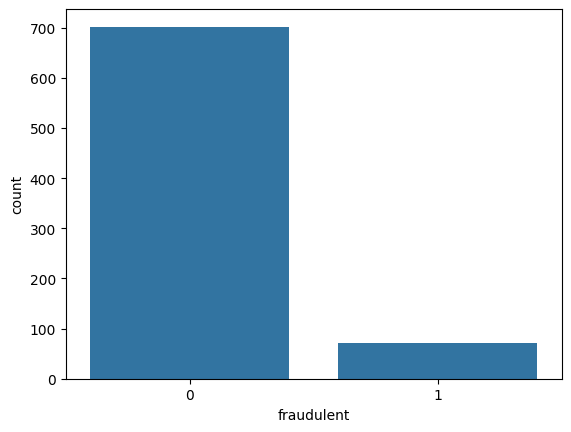

In [18]:
import seaborn as sns 
sns.countplot(x = "fraudulent", data = df) 

In [19]:
df.loc[:, 'fraudulent'].value_counts() 


fraudulent
0    702
1     72
Name: count, dtype: int64

array([0, 1])

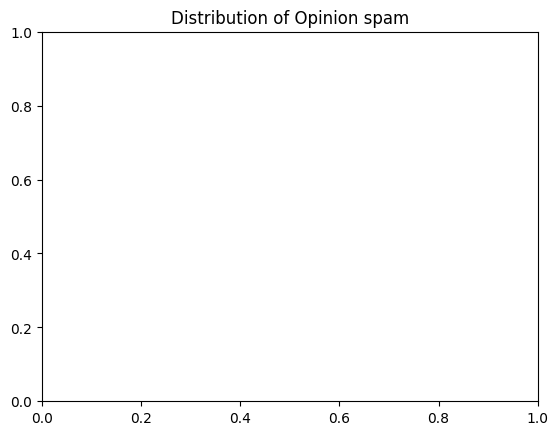

In [23]:
plt.title('Distribution of Opinion spam') 
df['fraudulent'].unique() 

In [24]:
df['fraudulent'].unique() 

array([0, 1])

In [25]:
truthful =df[df['fraudulent'] == 0]['description'].str.len() 

<Axes: xlabel='description', ylabel='Density'>

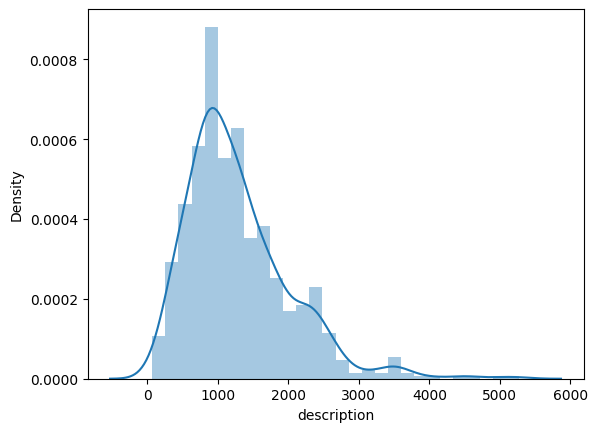

In [26]:
sns.distplot(truthful, label='Real')

In [27]:
deceptive = df[df['fraudulent'] == 1]['description'].str.len()

<Axes: xlabel='description', ylabel='Density'>

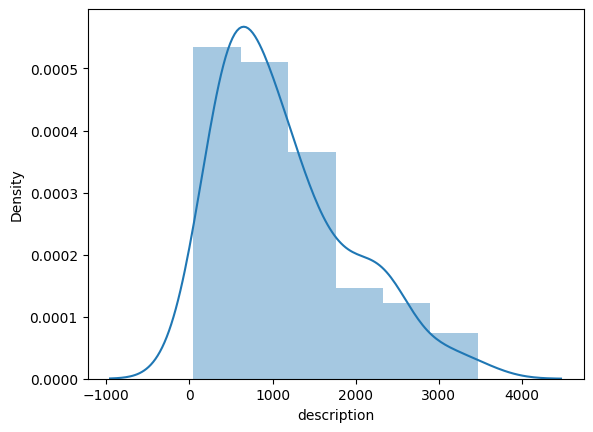

In [28]:
sns.distplot(deceptive, label='Fake')

Text(0.5, 1.0, 'Distribution by Length')

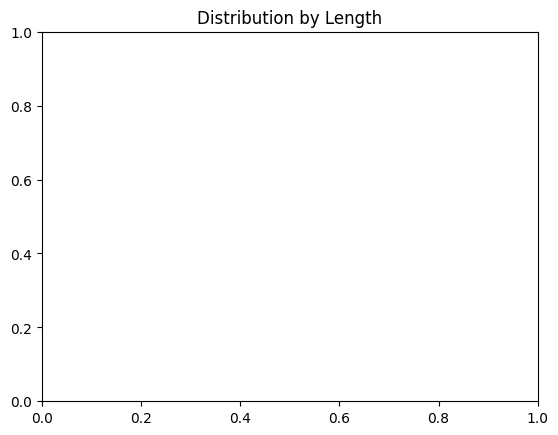

In [29]:
plt.title('Distribution by Length') 

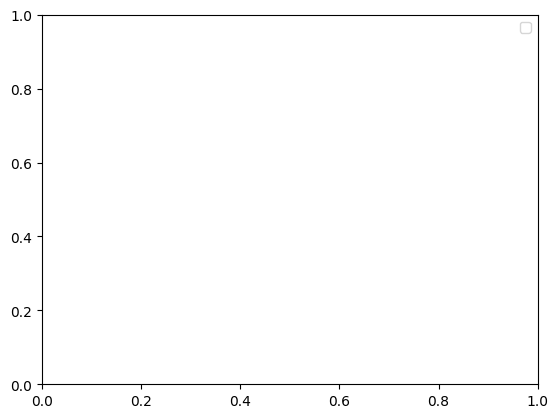

In [30]:
plt.legend() 

In [31]:
#plotting graph by digits. 
truthful1 = df[df['fraudulent'] == 0]['description'].str.replace(r'\D+', '').str.len()

<Axes: xlabel='description', ylabel='Density'>

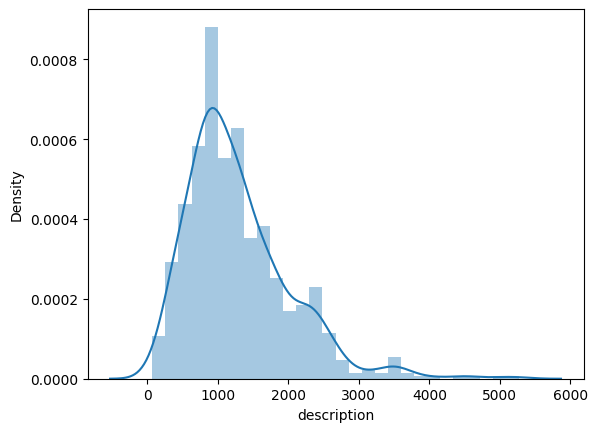

In [32]:
sns.distplot(truthful1, label='Real')

In [33]:
deceptive1 = df[df['fraudulent'] == 1]['description'].str.replace(r'\D+', '').str.len()

<Axes: xlabel='description', ylabel='Density'>

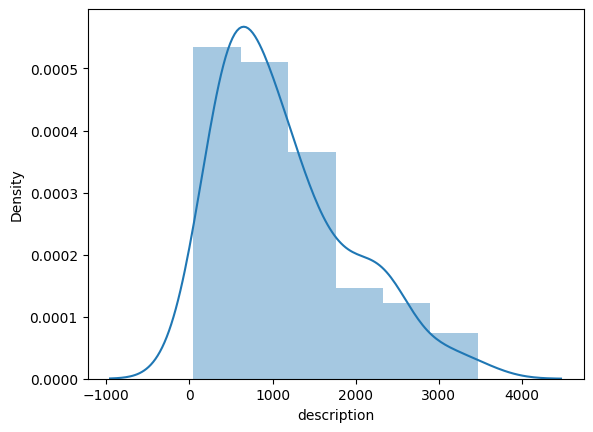

In [34]:
sns.distplot(deceptive1, label='Fake') 

Text(0.5, 1.0, 'Distribution by Digits')

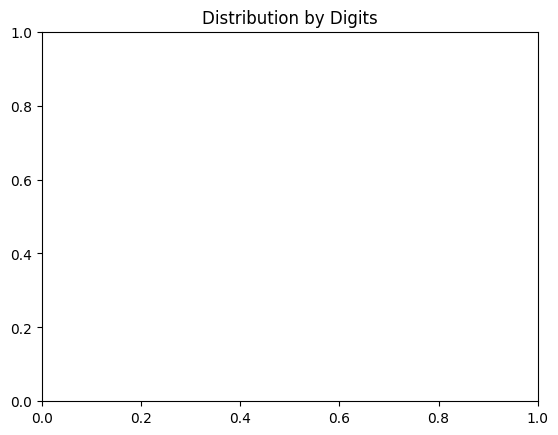

In [35]:
plt.title('Distribution by Digits') 

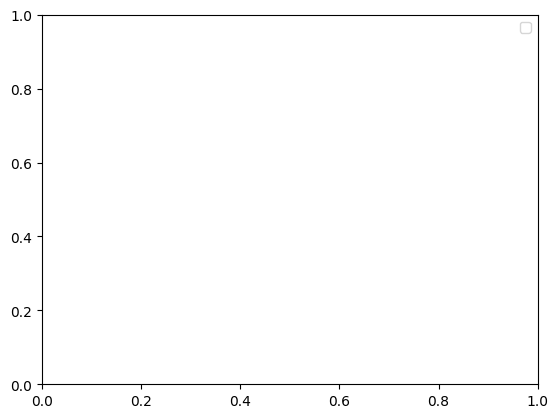

In [36]:
plt.legend()

In [37]:
#plotting graph for non-digits. 
truthful2 = df[df['fraudulent'] == 0]['description'].str.replace(r'\w+', '').str.len() 

<Axes: xlabel='description', ylabel='Density'>

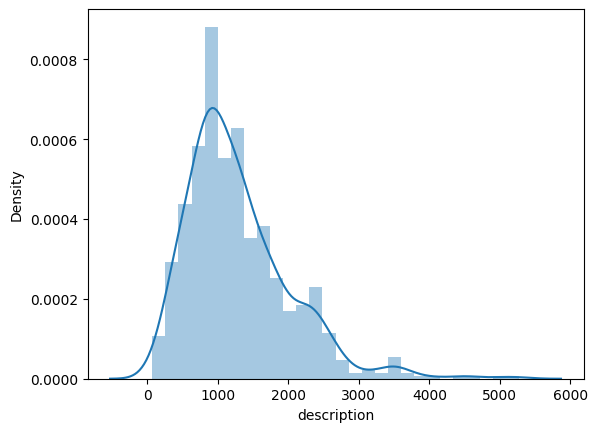

In [38]:
sns.distplot(truthful2, label='Real')

In [39]:
deceptive2 = df[df['fraudulent'] == 1]['description'].str.replace(r'\w+', '').str.len()

<Axes: xlabel='description', ylabel='Density'>

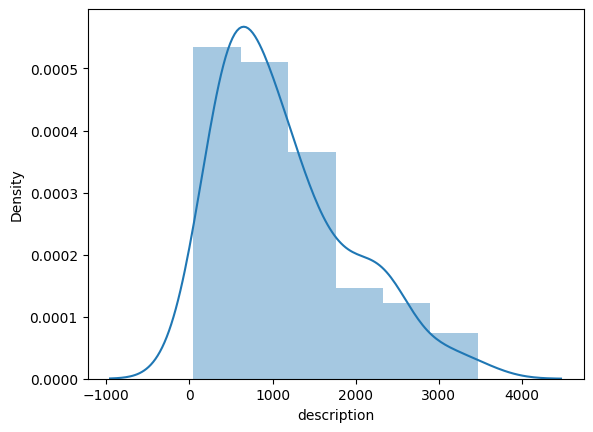

In [40]:
sns.distplot(deceptive2, label='Fake') 

Text(0.5, 1.0, 'Distribution of Non-Digits')

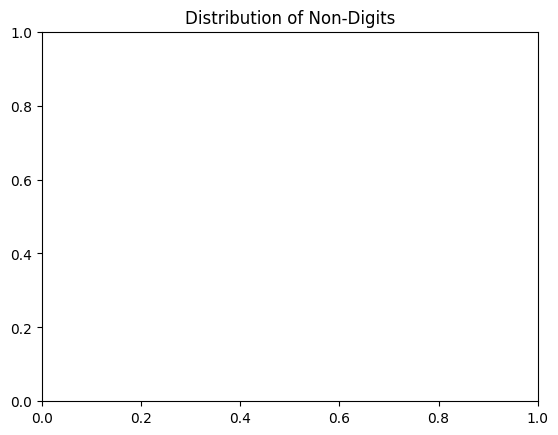

In [41]:
plt.title('Distribution of Non-Digits')

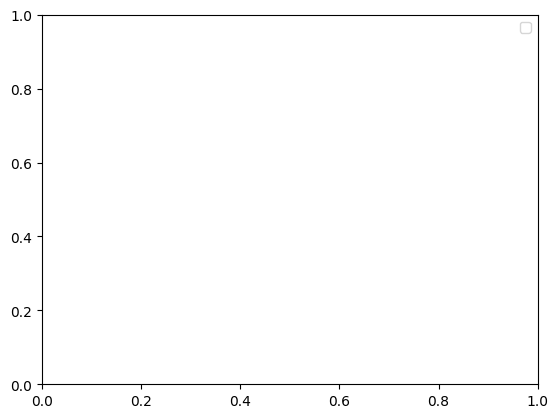

In [42]:
plt.legend()

In [43]:
!pip install nltk

You should consider upgrading via the 'C:\Users\Mages\python.exe -m pip install --upgrade pip' command.


In [56]:
import nltk 

In [57]:
from nltk.corpus import stopwords

In [46]:
from nltk.stem.porter import PorterStemmer

In [47]:
import re

In [48]:
import string

In [49]:
# remove whitespaces 
df['description']=df['description'].str.strip()

In [50]:
# lowercase the text 
df['description'] = df['description'].str.lower()

In [51]:
#remove punctuation 
punc = string.punctuation 
table = str.maketrans('','',punc)

In [52]:
df['description']=df['description'].apply(lambda x: x.translate(table))

In [53]:
# tokenizing each message 
df['word_tokens']=df.apply(lambda x: x['description'].split(' '),axis=1)

In [59]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mages\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [60]:
df['cleaned_text'] = df.apply(lambda x: [word for word in x['word_tokens'] if word not in 
stopwords.words('english')],axis=1)

In [61]:
ps = PorterStemmer()

In [62]:
df['stemmed']= df.apply(lambda x: [ps.stem(word) for word in x['cleaned_text']],axis=1)

In [63]:
# remove single letter words 
df['final_text'] = df.apply(lambda x: ' '.join([word for word in x['stemmed'] if 
len(word)>1]),axis=1) 

In [64]:
# divide the set in training and test 
from sklearn.model_selection import train_test_split

In [65]:
X,X_test,y,y_test = train_test_split(df.loc[:,'description':],df['fraudulent'],test_size=0.2)

In [66]:
# Now we'll create a vocabulary for the training set with word count 
from collections import defaultdict

In [69]:
vocab=defaultdict(int)  


In [73]:
for text in X['final_text'].values: 
    for elem in text.split(' '): 
         vocab[elem]+=1 

In [79]:
!pip install wordcloud

You should consider upgrading via the 'C:\Users\Mages\python.exe -m pip install --upgrade pip' command.


In [80]:
from wordcloud import WordCloud

In [81]:
ham_text=' '.join(X.loc[y==0,'final_text'].values)

In [82]:
ham_wordcloud = WordCloud(background_color='white',max_words=2000).generate(ham_text)

In [83]:
spam_text=' '.join(X.loc[y==1,'final_text'].values)

In [85]:
spam_wordcloud = WordCloud(background_color='white',max_words=2000).generate(spam_text)

In [86]:
plt.figure(figsize=[20,30])

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Axes: >

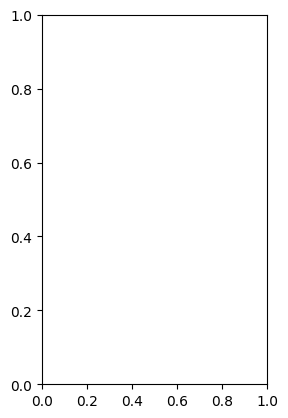

In [87]:
plt.subplot(1,2,1)

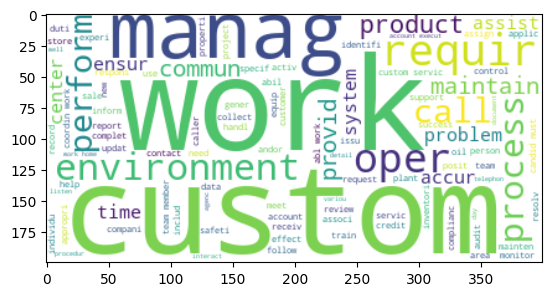

In [88]:
plt.imshow(spam_wordcloud,interpolation='bilinear') 

Text(0.5, 1.0, 'Jobposting:fake')

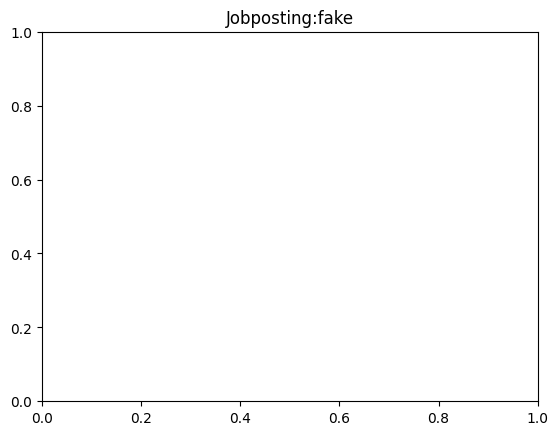

In [89]:
plt.title('Jobposting:fake')

<Axes: >

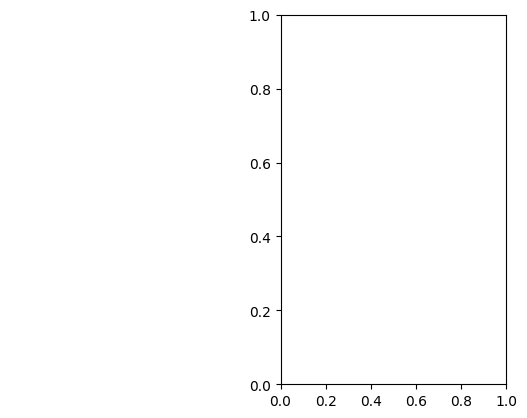

In [90]:
plt.axis('off') 
plt.subplot(1,2,2) 

Text(0.5, 1.0, 'Jobposting:real')

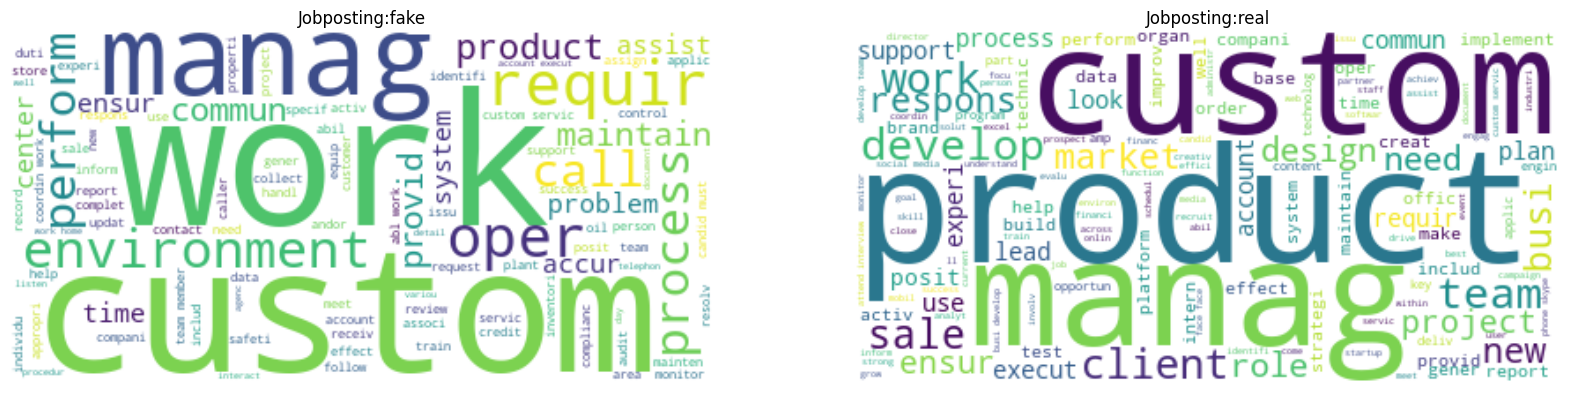

In [91]:
plt.figure(figsize=[20,30]) 
plt.subplot(1,2,1) 
plt.imshow(spam_wordcloud,interpolation='bilinear') 
plt.title('Jobposting:fake') 
plt.axis('off') 
plt.subplot(1,2,2) 
plt.imshow(ham_wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Jobposting:real')